In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/full-apple-tv-dataset/data.csv


# Importing libraries


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


# Reading the dataset

In [6]:
data = pd.read_csv('/kaggle/input/full-apple-tv-dataset/data.csv')
data

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,Comedy,1995.0,tt0113101,6.7,112548.0,DE
1,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2315889.0,"AU, CA, DE, US"
2,Citizen Kane,movie,"Drama, Mystery",1941.0,tt0033467,8.3,473046.0,"DE, GB"
3,Metropolis,movie,"Drama, Sci-Fi",1927.0,tt0017136,8.3,189498.0,GB
4,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1221592.0,"BR, CL, CO, MX"
...,...,...,...,...,...,...,...,...
17562,D+day,tv,Drama,2020.0,tt33338933,NaN,NaN,US
17563,"Kennedy, Sinatra and the Mafia",tv,"Crime, Documentary, History",2023.0,tt29685022,6.8,97.0,CA
17564,NaN,tv,Documentary,2023.0,NaN,NaN,NaN,DE
17565,These Stones,tv,Drama,2024.0,tt17492344,8.8,18.0,US


# basic data info

data info about dtypes 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17567 entries, 0 to 17566
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               17081 non-null  object 
 1   type                17567 non-null  object 
 2   genres              16983 non-null  object 
 3   releaseYear         17545 non-null  float64
 4   imdbId              16268 non-null  object 
 5   imdbAverageRating   15860 non-null  float64
 6   imdbNumVotes        15860 non-null  float64
 7   availableCountries  17567 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.1+ MB


checking total of null values

In [9]:
data.isnull().sum()

title                  486
type                     0
genres                 584
releaseYear             22
imdbId                1299
imdbAverageRating     1707
imdbNumVotes          1707
availableCountries       0
dtype: int64

statistical description of 'float' data columns

In [11]:
data.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
releaseYear,17545.0,2006.625819,17.881141,1902.0,2000.0,2014.0,2019.0,2025.0
imdbAverageRating,15860.0,6.380851,1.164461,1.3,5.7,6.5,7.2,9.4
imdbNumVotes,15860.0,26063.844136,100062.247421,5.0,211.0,1291.5,8344.0,2315889.0


traversing each column to find unique value counts 

In [25]:
columns = ['title','type','genres','releaseYear','imdbId','imdbAverageRating','imdbNumVotes','availableCountries']
for column in columns:
    print(column,data[column].value_counts().unique())

title [5 4 3 2 1]
type [13598  3969]
genres [1523 1370  889  537  527  508  470  416  320  258  242  225  219  217
  211  208  200  166  157  143  139  138  131  124  123  120  119  118
  111  109  104  101  100   90   85   79   78   76   72   71   70   68
   67   62   61   58   56   54   52   51   49   48   47   46   44   42
   41   40   39   38   37   36   35   33   32   31   30   29   28   27
   26   25   24   23   22   21   20   19   18   17   16   15   14   13
   12   11   10    9    8    7    6    5    4    3    2    1]
releaseYear [1145  999  906  870  816  809  794  763  733  605  598  483  455  390
  373  357  320  300  279  265  206  205  178  168  158  156  149  148
  146  145  142  141  139  135  134  133  130  129  125  123  104   97
   85   83   79   78   77   65   64   62   58   57   56   55   52   50
   46   43   40   38   37   33   27   26   19   18   17   16   13   11
   10    8    5    4    3    2    1]
imdbId [2 1]
imdbAverageRating [588 580 559 541 523 522 521 513 

# EDA

filling missing values

In [29]:
data['releaseYear'].fillna(data['releaseYear'].median(), inplace=True)
data['imdbAverageRating'].fillna(data['imdbAverageRating'].median(), inplace=True)
data['imdbNumVotes'].fillna(data['imdbNumVotes'].median(), inplace=True)
data['title'].fillna('Unknown', inplace=True)
data['genres'].fillna('Unknown', inplace=True)
data['imdbId'].fillna('Unknown', inplace=True)
data.isnull().sum()

/tmp/ipykernel_31/1895920554.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['releaseYear'].fillna(data['releaseYear'].median(), inplace=True)
/tmp/ipykernel_31/1895920554.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

title                 0
type                  0
genres                0
releaseYear           0
imdbId                0
imdbAverageRating     0
imdbNumVotes          0
availableCountries    0
dtype: int64

In [30]:
data['genres'] = data['genres'].apply(lambda x: [genre.strip().lower() for genre in x.split(', ') if genre != 'Unknown'] if pd.notna(x) else ['Unknown'])

data['availableCountries']= data['availableCountries'].apply(lambda x: [country.strip().upper() for country in x.split(', ') if country != 'Unknown'] if pd.notna(x) else ['Unknown'])

In [32]:
data.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,[comedy],1995.0,tt0113101,6.7,112548.0,[DE]
1,Forrest Gump,movie,"[drama, romance]",1994.0,tt0109830,8.8,2315889.0,"[AU, CA, DE, US]"
2,Citizen Kane,movie,"[drama, mystery]",1941.0,tt0033467,8.3,473046.0,"[DE, GB]"
3,Metropolis,movie,"[drama, sci-fi]",1927.0,tt0017136,8.3,189498.0,[GB]
4,Kill Bill: Vol. 1,movie,"[action, crime, thriller]",2003.0,tt0266697,8.2,1221592.0,"[BR, CL, CO, MX]"


In [36]:
from collections import Counter
all_genre = [genre for sublist in data['genres'] for genre in sublist]
genre_list = Counter(all_genre)
len(genre_list)

37

In [38]:
all_countries = [country for countryList in data['availableCountries'] for country in countryList]
country_counts = Counter(all_countries)
len(country_counts)

85

In [39]:
genre_counts = pd.DataFrame(genre_list.items(), columns=['genre', 'count']) 
genre_counts

,genre,count
0,comedy,4574
1,drama,7969
2,romance,2655
3,mystery,1547
4,sci-fi,478
5,action,2114
6,crime,2525
7,thriller,2143
8,war,269
9,western,307


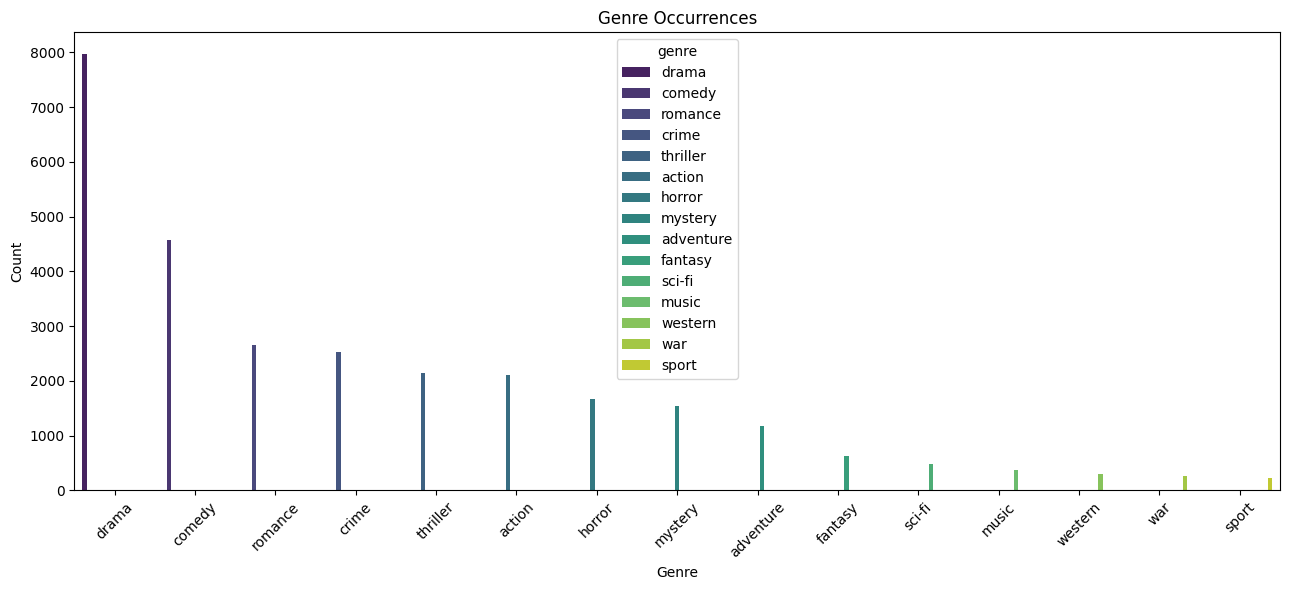

<Figure size 1300x1300 with 0 Axes>

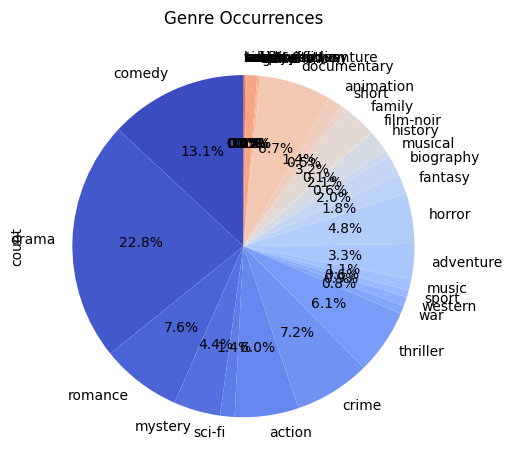

In [43]:
plt.figure(figsize=(13, 6))
sns.barplot(data=genre_counts.head(15).sort_values(by='count',ascending=False), x='genre', y='count', palette="viridis",hue='genre')
plt.title('Genre Occurrences')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(13, 13))
genre_counts.set_index('genre').plot.pie(y='count', autopct='%1.1f%%', cmap="coolwarm", legend=False, startangle=90)
plt.title('Genre Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
highest_rated_data = data[data['imdbAverageRating']>7.0]
highest_rated_genres = highest_rated_data['genres'].explode()
highest_rated_counts = Counter(highest_rated_genres)
highest_rated_genre_count_data = pd.DataFrame(highest_rated_counts.items(),columns=['genre','count'])
highest_rated_genre_count_data = highest_rated_genre_count_data.sort_values(by='count',ascending=False)
highest_rated_genre_count_data

,genre,count
0,drama,2460
22,documentary,1137
12,comedy,1116
5,crime,835
1,romance,515
16,history,428
4,action,395
2,mystery,390
6,thriller,361
15,biography,341


<Figure size 1000x600 with 0 Axes>

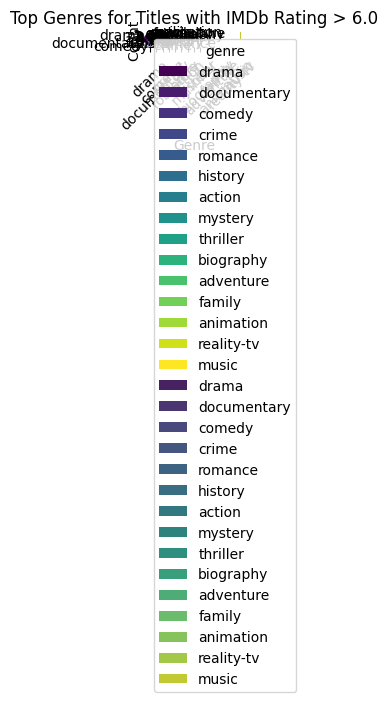

In [52]:
plt.figure(figsize=(10, 6))

highest_rated_genre_count_data.head(15).set_index('genre').plot.pie(y='count', autopct='%1.1f%%', cmap="viridis", legend=False, startangle=90)

sns.barplot(data=highest_rated_genre_count_data.head(15), x='genre', y='count', palette="viridis",hue='genre')

plt.title('Top Genres for Titles with IMDb Rating > 6.0')

plt.xlabel('Genre')

plt.ylabel('Count')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

# top 10 movies and tv series on apple

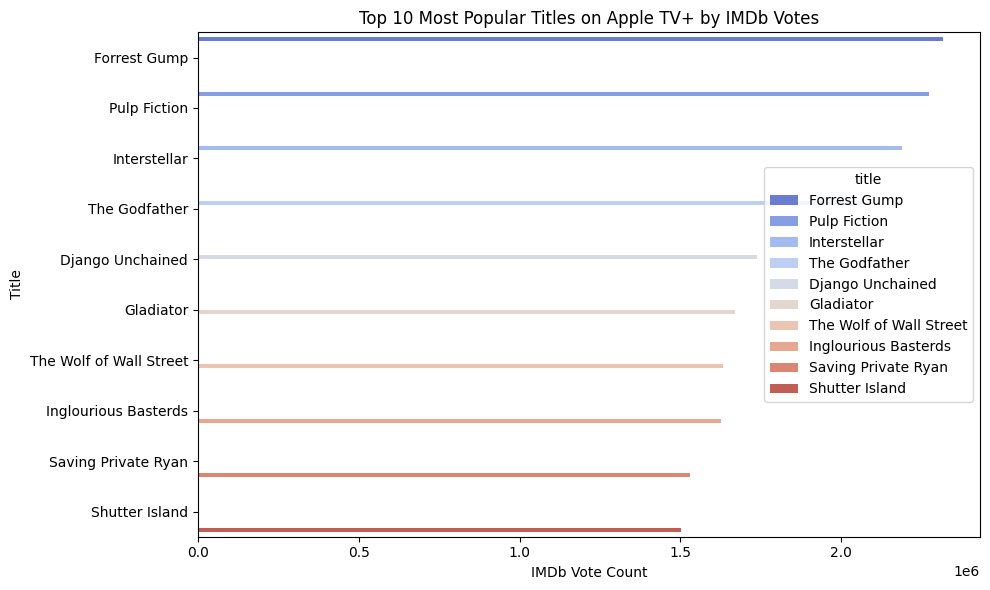

In [54]:
top_10_popular_titles_data = data.sort_values(by='imdbNumVotes', ascending=False).head(10)
top_10_popular_titles = top_10_popular_titles_data[['title', 'imdbNumVotes']]
top_10_popular_titles

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_popular_titles, x='imdbNumVotes', y='title', palette="coolwarm",hue='title')
plt.title('Top 10 Most Popular Titles on Apple TV+ by IMDb Votes')
plt.xlabel('IMDb Vote Count')
plt.ylabel('Title')
plt.tight_layout()
plt.show()


,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,[comedy],1995.0,tt0113101,6.7,112548.0,[DE]
1,Forrest Gump,movie,"[drama, romance]",1994.0,tt0109830,8.8,2315889.0,"[AU, CA, DE, US]"
2,Citizen Kane,movie,"[drama, mystery]",1941.0,tt0033467,8.3,473046.0,"[DE, GB]"
3,Metropolis,movie,"[drama, sci-fi]",1927.0,tt0017136,8.3,189498.0,[GB]
4,Kill Bill: Vol. 1,movie,"[action, crime, thriller]",2003.0,tt0266697,8.2,1221592.0,"[BR, CL, CO, MX]"
...,...,...,...,...,...,...,...,...
17562,D+day,tv,[drama],2020.0,tt33338933,6.5,1291.5,[US]
17563,"Kennedy, Sinatra and the Mafia",tv,"[crime, documentary, history]",2023.0,tt29685022,6.8,97.0,[CA]
17564,Unknown,tv,[documentary],2023.0,Unknown,6.5,1291.5,[DE]
17565,These Stones,tv,[drama],2024.0,tt17492344,8.8,18.0,[US]
